# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes/customer_personality_analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes/customer_personality_analysis'

# Section 1

Section 1 content

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [5]:
file_path = os.path.join(current_dir, 'marketing_campaign.csv')
cpa_df = pd.read_csv(file_path, sep='\t')
print(cpa_df.shape)
print(cpa_df.head(10))

(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7

In [9]:
#Fixing the misspelled column names
cpa_df.rename(columns={'Teenhome': 'Teens In Household',
                       'Kidhome': 'Kids In Household',
                       'Year_Birth': 'Birth Year',
                       'Education': 'Education Level',
                       'Marital_Status': 'Marital Status',
                       'Income': 'Annual Income',
                       'NumDealsPurchases': 'Deals Purchases Count',
                       'NumWebPurchases': 'Web Purchases Count',
                       'NumCatalogPurchases': 'Catalog Purchases Count', 
                       'NumStorePurchases': 'Store Purchases Count',
                       'NumWebVisitsMonth': 'Web Visits per Month',
                       'MntWines': 'Wines Expenditure',
                       'MntFruits': 'Fruits Expenditure',
                       'MntMeatProducts': 'Meat Products Expenditure',
                       'MntFishProducts': 'Fish Products Expenditure',
                       'MntSweetProducts': 'Sweet Products Expenditure',
                       'MntGoldProds': 'Gold Products Expendture',
                       'Dt_Customer': 'Date Of Enrollment',
                       'Recency': 'Last Purchase days',
                       'Complain': 'Complaint',
                       'Response': 'Accepted Offer',
                       'AcceptedCmp1': 'Accepted Campaign 1',
                       'AcceptedCmp2': 'Accepted Campaign 2',
                       'AcceptedCmp3': 'Accepted Campaign 3',
                       'AcceptedCmp4': 'Accepted Campaign 4',
                       'AcceptedCmp5': 'Accepted Campaign 5',
                       },
                         inplace=True)

In [10]:
# Shows data types of each column
print(cpa_df.dtypes)  

ID                              int64
Birth Year                      int64
Education Level                object
Marital Status                 object
Annual Income                 float64
Kids In Household               int64
Teens In Household              int64
Date Of Enrollment             object
Last Purchase days              int64
Wines Expenditure               int64
Fruits Expenditure              int64
Meat Products Expenditure       int64
Fish Products Expenditure       int64
Sweet Products Expenditure      int64
Gold Products Expendture        int64
Deals Purchases Count           int64
Web Purchases Count             int64
Catalog Purchases Count         int64
Store Purchases Count           int64
Web Visits per Month            int64
Accepted Campaign 3             int64
Accepted Campaign 4             int64
Accepted Campaign 5             int64
Accepted Campaign 1             int64
Accepted Campaign 2             int64
Complaint                       int64
Z_CostContac

In [11]:
# Convert ID to string
cpa_df['ID'] = cpa_df['ID'].astype(str)

# Convert categorical columns to category type
cpa_df['Education Level'] = cpa_df['Education Level'].astype('category')
cpa_df['Marital Status'] = cpa_df['Marital Status'].astype('category')

# Convert date column to datetime format
cpa_df['Date Of Enrollment'] = pd.to_datetime(cpa_df['Date Of Enrollment'], dayfirst=True)

# Convert monetary values to float64
monetary_columns = ['Wines Expenditure', 'Fruits Expenditure',
                    'Meat Products Expenditure', 'Fish Products Expenditure',
                    'Sweet Products Expenditure', 'Gold Products Expendture']

cpa_df[monetary_columns] = cpa_df[monetary_columns].astype(float)

# Convert binary columns (campaign responses & complaints) to boolean
binary_columns = ['Accepted Campaign 1', 'Accepted Campaign 2', 'Accepted Campaign 3', 
                  'Accepted Campaign 4', 'Accepted Campaign 5', 'Accepted Offer', 'Complaint']
cpa_df[binary_columns] = cpa_df[binary_columns].astype(bool)
# Shows data types of each column
print(f' the data types after conversion: {cpa_df.dtypes}')

 the data types after conversion: ID                                    object
Birth Year                             int64
Education Level                     category
Marital Status                      category
Annual Income                        float64
Kids In Household                      int64
Teens In Household                     int64
Date Of Enrollment            datetime64[ns]
Last Purchase days                     int64
Wines Expenditure                    float64
Fruits Expenditure                   float64
Meat Products Expenditure            float64
Fish Products Expenditure            float64
Sweet Products Expenditure           float64
Gold Products Expendture             float64
Deals Purchases Count                  int64
Web Purchases Count                    int64
Catalog Purchases Count                int64
Store Purchases Count                  int64
Web Visits per Month                   int64
Accepted Campaign 3                     bool
Accepted Campaign 4  

In [12]:
#Data Frame Numeric columns Description
print(cpa_df.select_dtypes(include=['float64']).describe())

       Annual Income  Wines Expenditure  Fruits Expenditure  \
count    2216.000000        2240.000000         2240.000000   
mean    52247.251354         303.935714           26.302232   
std     25173.076661         336.597393           39.773434   
min      1730.000000           0.000000            0.000000   
25%     35303.000000          23.750000            1.000000   
50%     51381.500000         173.500000            8.000000   
75%     68522.000000         504.250000           33.000000   
max    666666.000000        1493.000000          199.000000   

       Meat Products Expenditure  Fish Products Expenditure  \
count                2240.000000                2240.000000   
mean                  166.950000                  37.525446   
std                   225.715373                  54.628979   
min                     0.000000                   0.000000   
25%                    16.000000                   3.000000   
50%                    67.000000                  12.0

In [13]:
#check for empty values
empty_values = cpa_df.isnull().sum()
print(empty_values)

ID                             0
Birth Year                     0
Education Level                0
Marital Status                 0
Annual Income                 24
Kids In Household              0
Teens In Household             0
Date Of Enrollment             0
Last Purchase days             0
Wines Expenditure              0
Fruits Expenditure             0
Meat Products Expenditure      0
Fish Products Expenditure      0
Sweet Products Expenditure     0
Gold Products Expendture       0
Deals Purchases Count          0
Web Purchases Count            0
Catalog Purchases Count        0
Store Purchases Count          0
Web Visits per Month           0
Accepted Campaign 3            0
Accepted Campaign 4            0
Accepted Campaign 5            0
Accepted Campaign 1            0
Accepted Campaign 2            0
Complaint                      0
Z_CostContact                  0
Z_Revenue                      0
Accepted Offer                 0
dtype: int64


In [14]:
# fill the empty values in the income column with the income of the same age martial status.
cpa_df['Annual Income'].fillna(cpa_df.groupby('Marital Status')['Annual Income'].transform('median'), inplace=True)
empty_values = cpa_df['Annual Income'].isnull().sum()
print(f'the count on Annual Income empty values is: {empty_values}')

the count on Annual Income empty values is: 0


/tmp/ipykernel_484792/3257952045.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpa_df['Annual Income'].fillna(cpa_df.groupby('Marital Status')['Annual Income'].transform('median'), inplace=True)
/tmp/ipykernel_484792/3257952045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cpa_df['Annual Income'].fillna(cpa_df.groupby('Marital

In [15]:
# cap outliers in the numeric columns
numeric_columns = cpa_df.select_dtypes(include=['float64']).columns

for col in numeric_columns:
    Q1 = cpa_df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = cpa_df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    cpa_df[col] = np.where(cpa_df[col] < lower_bound, lower_bound, cpa_df[col])
    cpa_df[col] = np.where(cpa_df[col] > upper_bound, upper_bound, cpa_df[col])


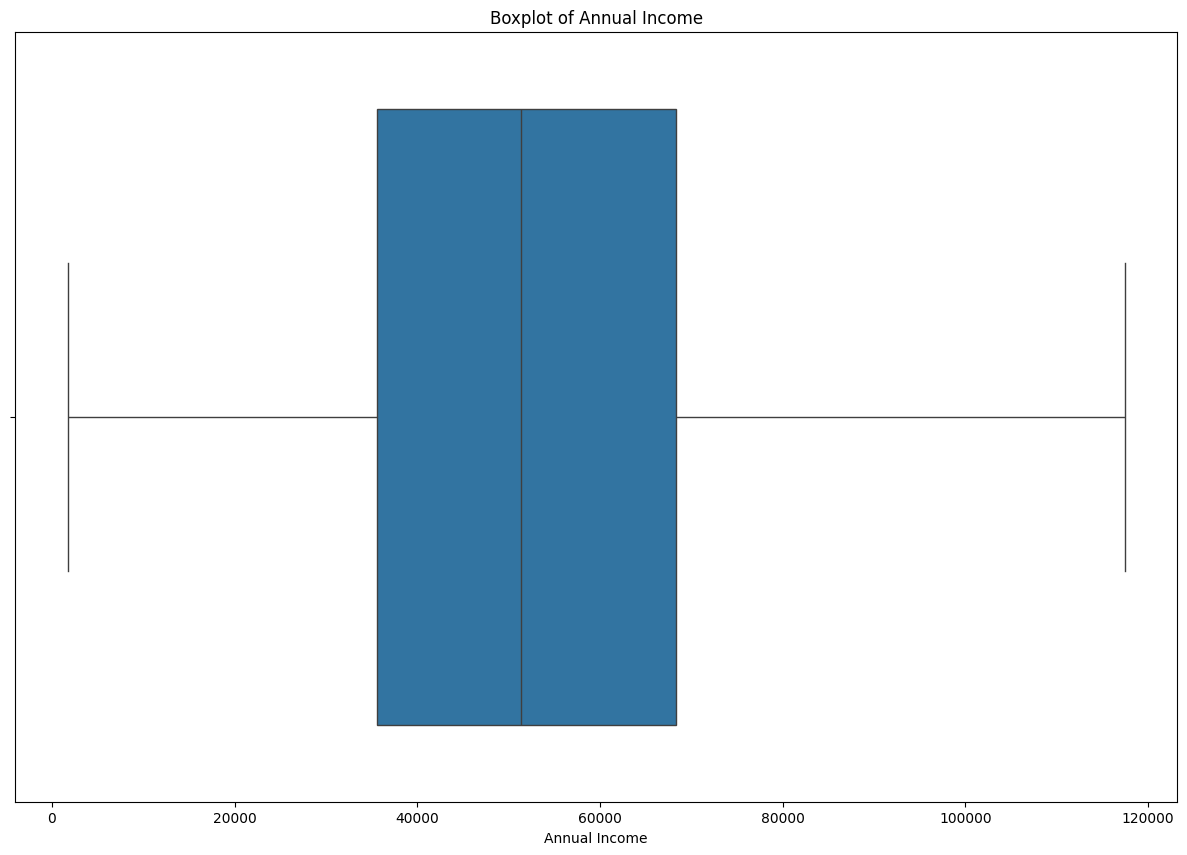

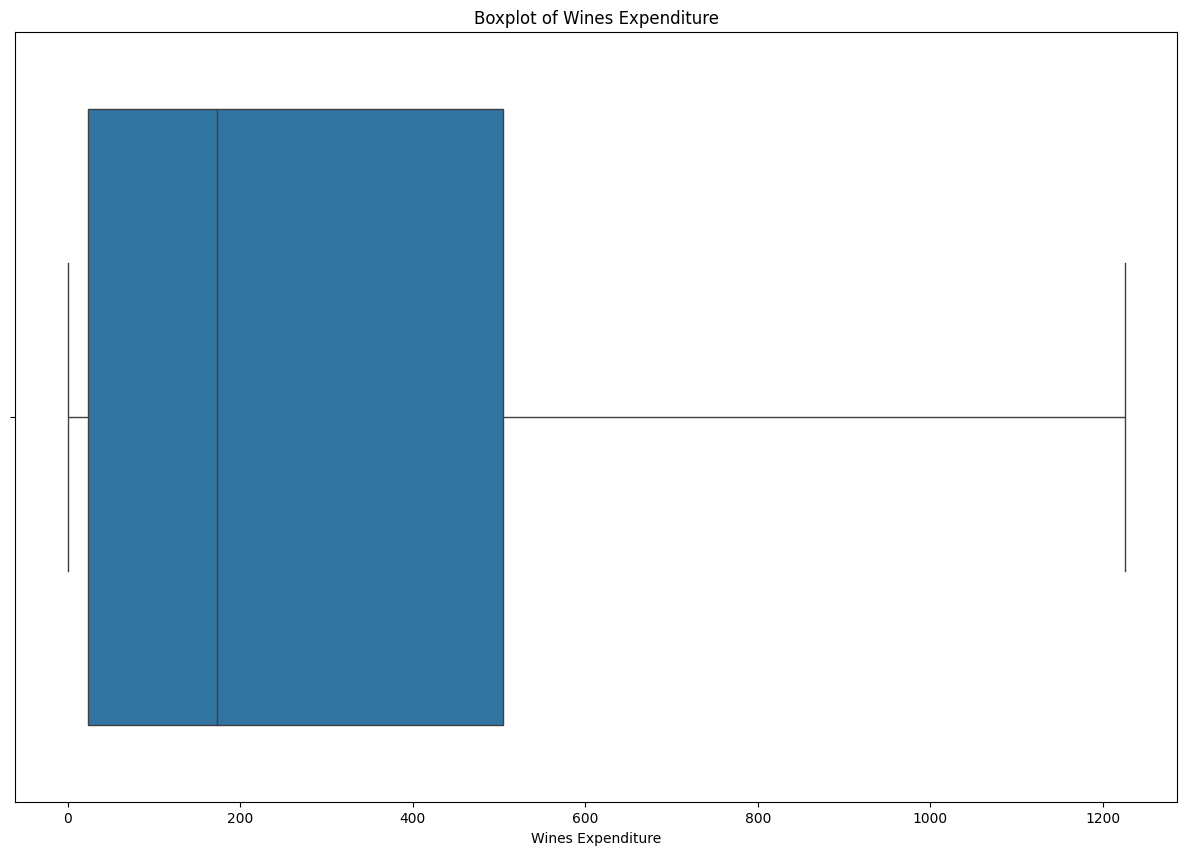

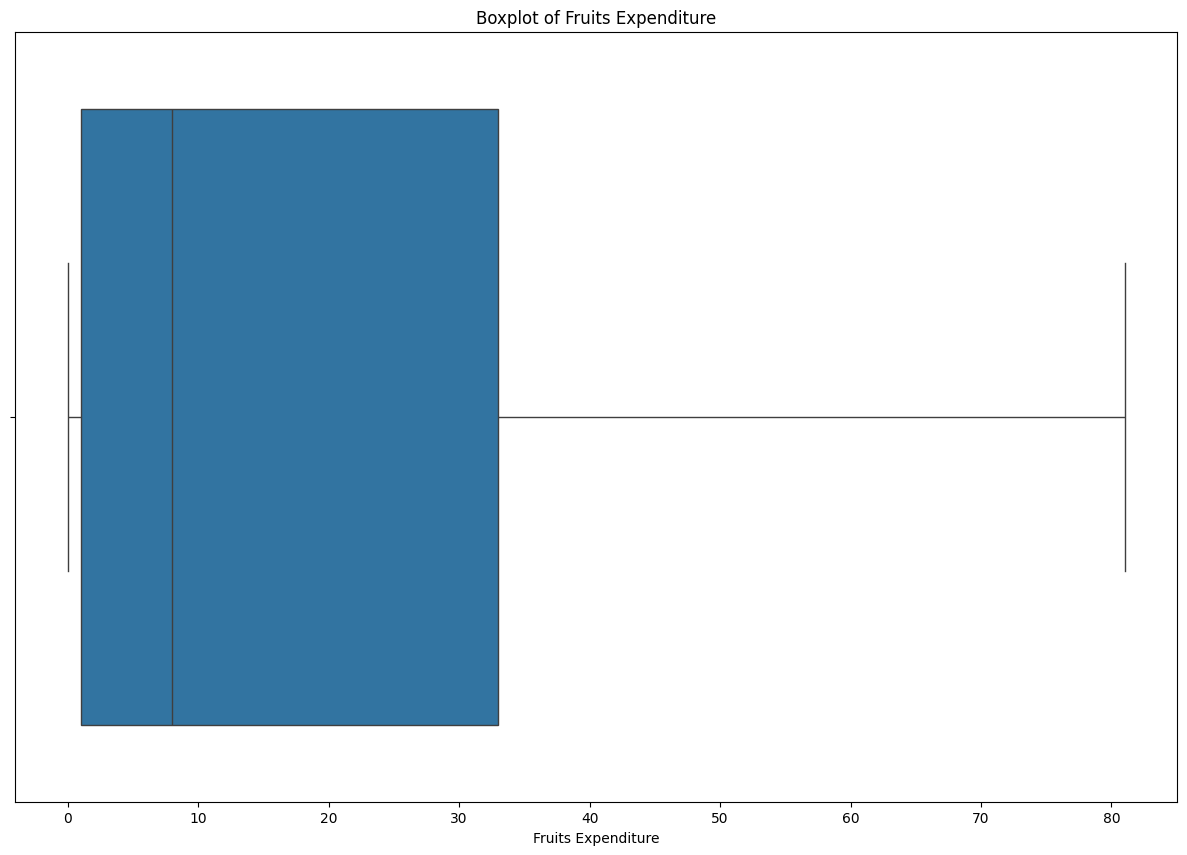

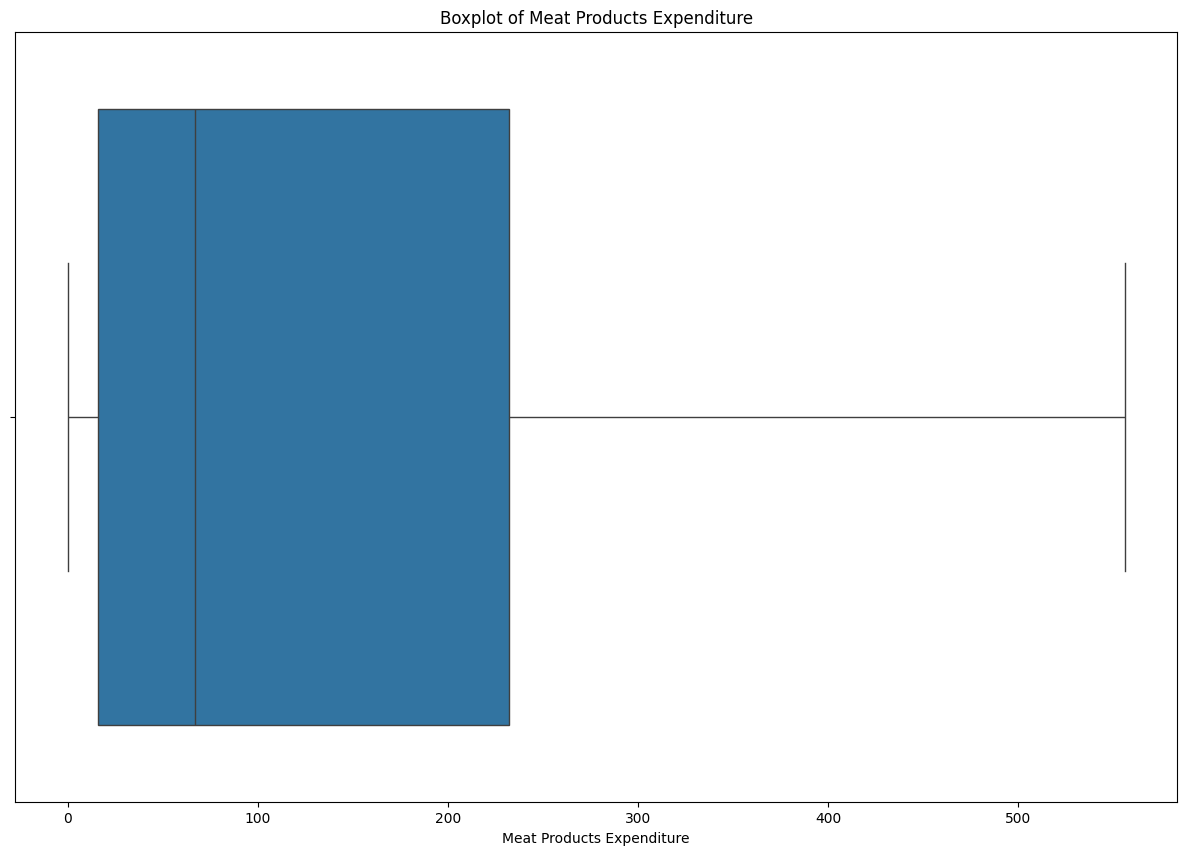

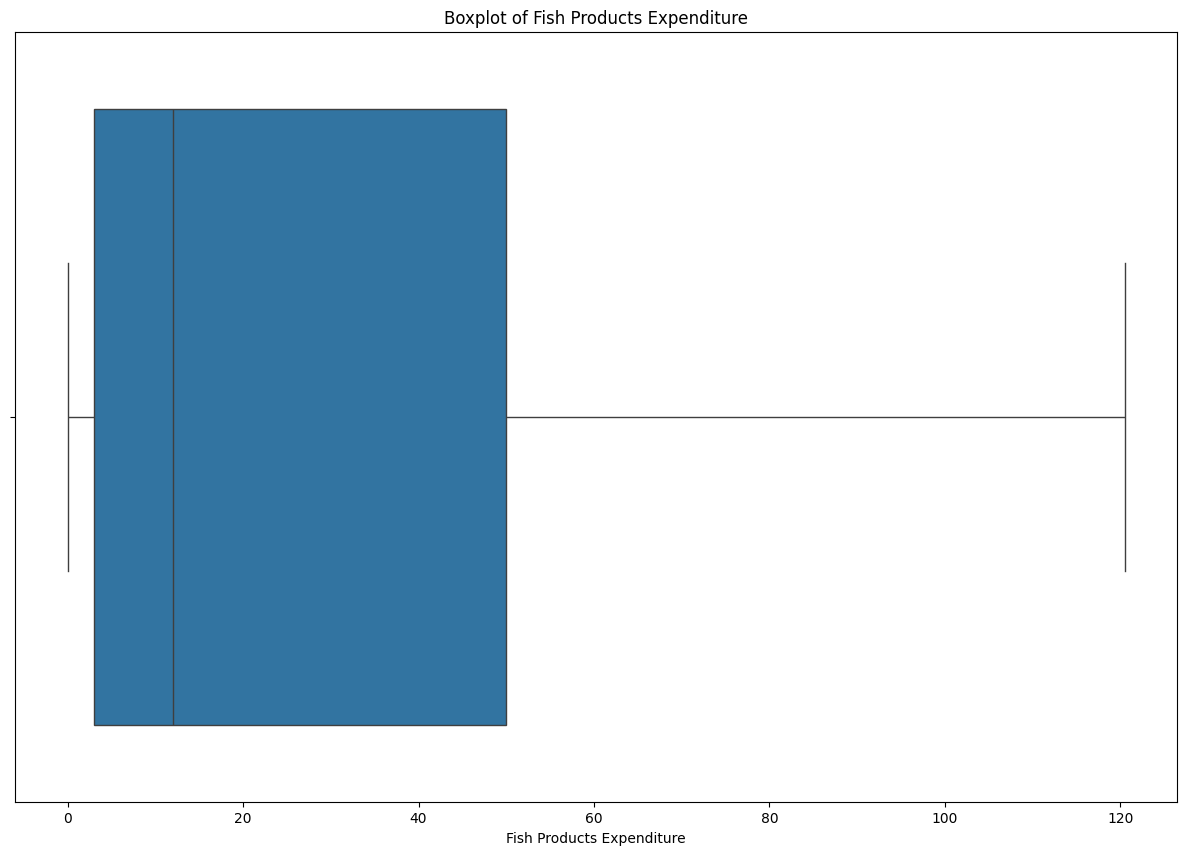

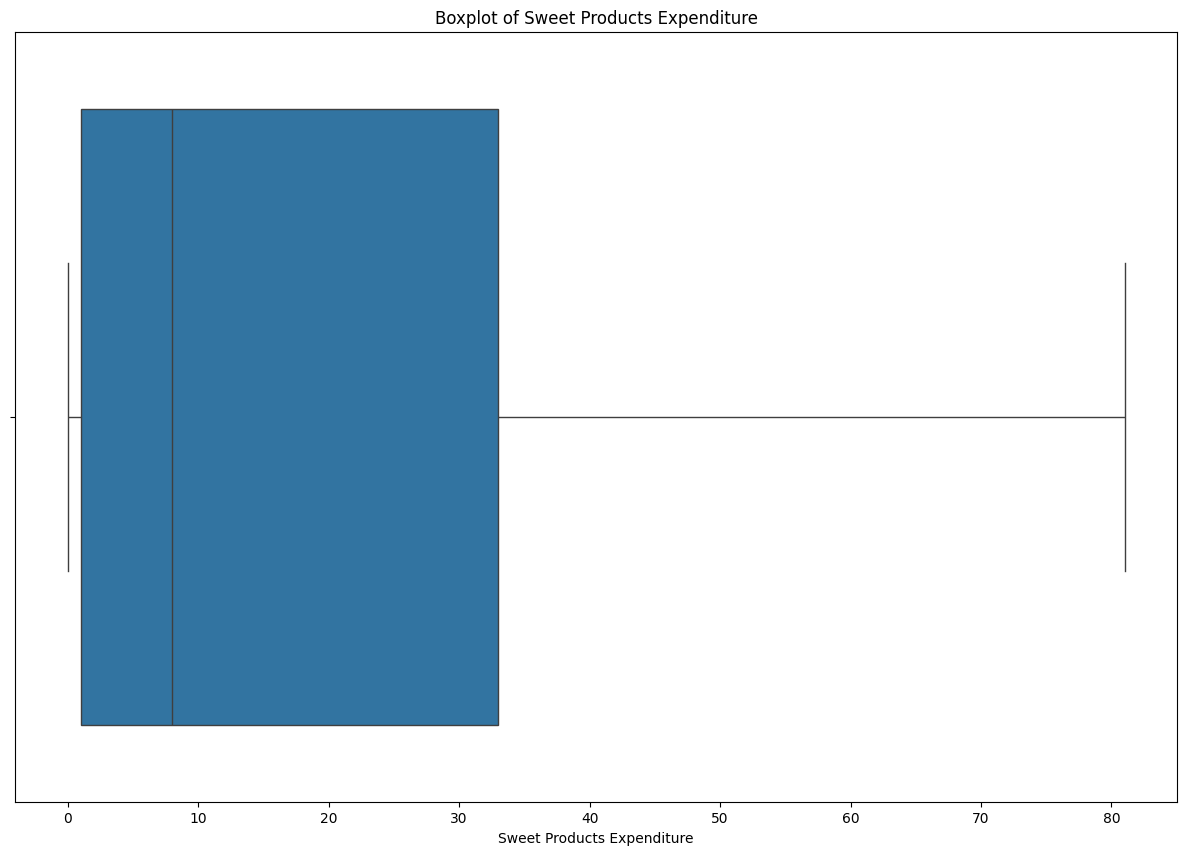

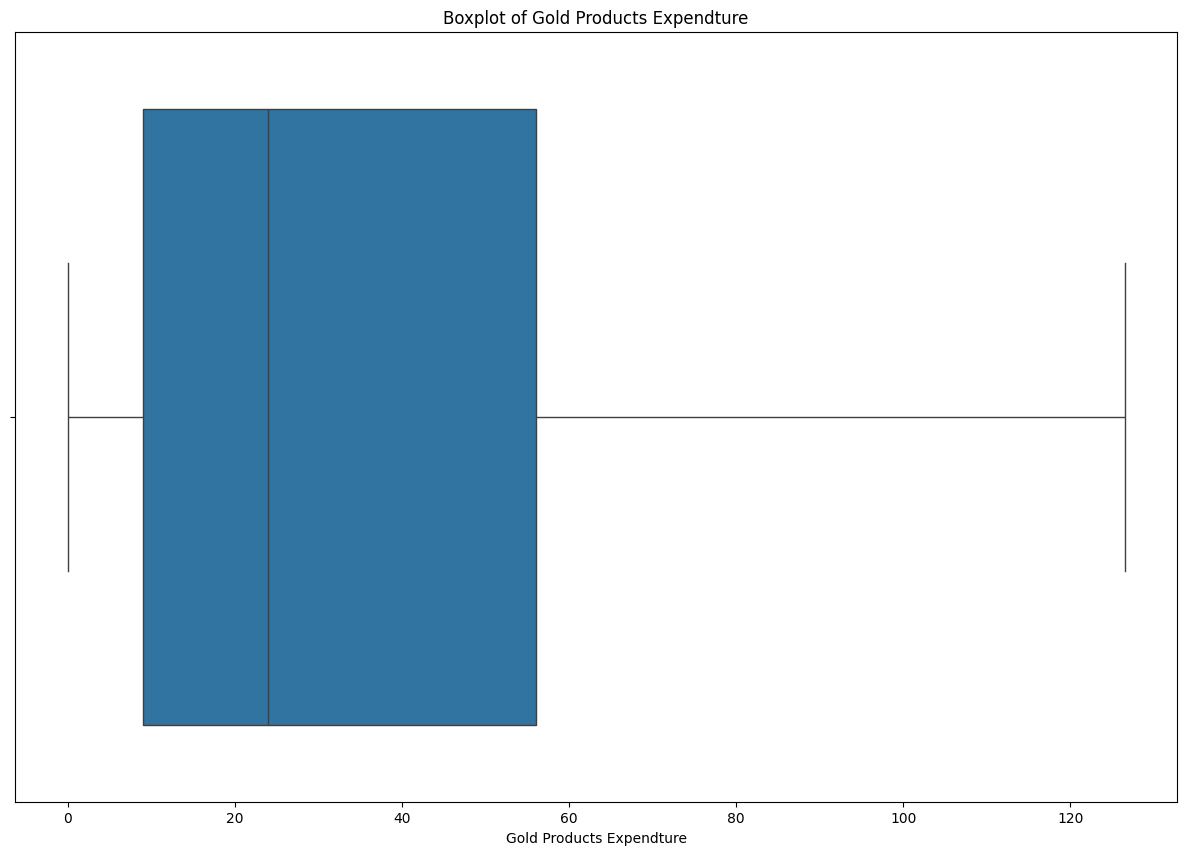

In [16]:
#Boxplots to spot if any outliers in all the numerical columns still exist
for col in numeric_columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=cpa_df[col], orient='h')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:
# Create new columns for better analysis
cpa_df['Total Purchases'] = cpa_df['Deals Purchases Count'] + cpa_df['Web Purchases Count'] + cpa_df['Catalog Purchases Count'] + cpa_df['Store Purchases Count']
cpa_df['Total Expenditure'] = cpa_df['Wines Expenditure'] + cpa_df['Fruits Expenditure'] + cpa_df['Meat Products Expenditure'] + cpa_df['Fish Products Expenditure'] + cpa_df['Sweet Products Expenditure'] + cpa_df['Gold Products Expendture']
cpa_df['Total Accepted Campaigns'] = cpa_df[['Accepted Campaign 1', 'Accepted Campaign 2', 'Accepted Campaign 3', 'Accepted Campaign 4', 'Accepted Campaign 5']].astype(int).sum(axis=1)
cpa_df['age'] = 2021 - cpa_df['Birth Year']
cpa_df['Is Recent Customer'] = cpa_df['Last Purchase days'] < 60
cpa_df['dependants Count'] = cpa_df['Kids In Household'] + cpa_df['Teens In Household']
cpa_df['Customer Tenure Years'] = (2021 - cpa_df['Date Of Enrollment'].dt.year)


#print the data frame data types
print(cpa_df.info)


<bound method DataFrame.info of          ID  Birth Year Education Level Marital Status  Annual Income  \
0      5524        1957      Graduation         Single        58138.0   
1      2174        1954      Graduation         Single        46344.0   
2      4141        1965      Graduation       Together        71613.0   
3      6182        1984      Graduation       Together        26646.0   
4      5324        1981             PhD        Married        58293.0   
...     ...         ...             ...            ...            ...   
2235  10870        1967      Graduation        Married        61223.0   
2236   4001        1946             PhD       Together        64014.0   
2237   7270        1981      Graduation       Divorced        56981.0   
2238   8235        1956          Master       Together        69245.0   
2239   9405        1954             PhD        Married        52869.0   

      Kids In Household  Teens In Household Date Of Enrollment  \
0                     0  

In [18]:
# Save the cleaned data to a new csv file
cpa_df.to_csv('cleaned_marketing_campaign.csv', index=False)

---

# Section 2

Section 2 content

## Basic Visualizaitions for features extraction

/tmp/ipykernel_484792/3770672810.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_484792/3770672810.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_484792/3770672810.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


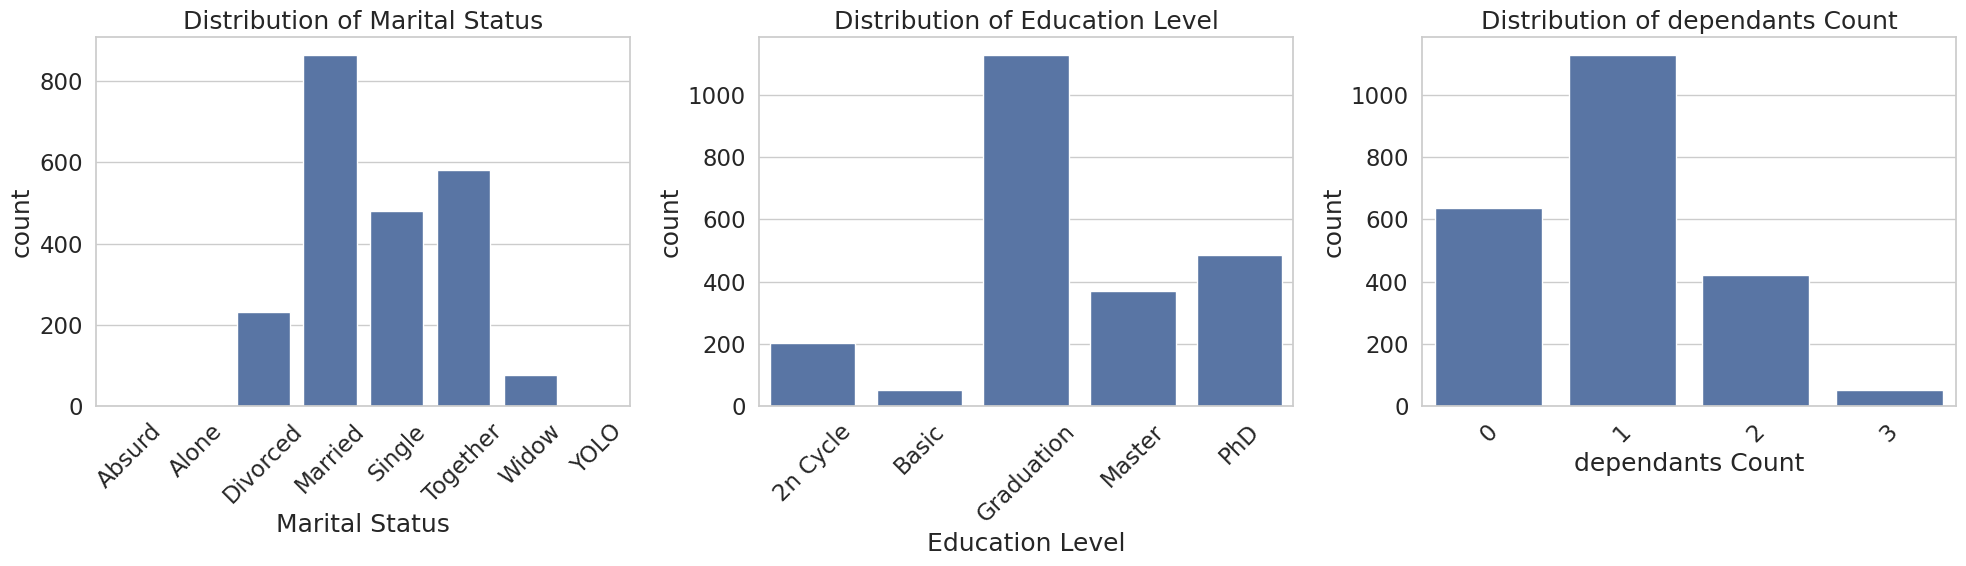

In [44]:
#plotting the distribution of the Marital Status, Education Level, and the number of dependants
customer_profile = cpa_df[['Marital Status', 'Education Level', 'dependants Count']]
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(customer_profile.columns):
    sns.countplot(x=col, data=customer_profile, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

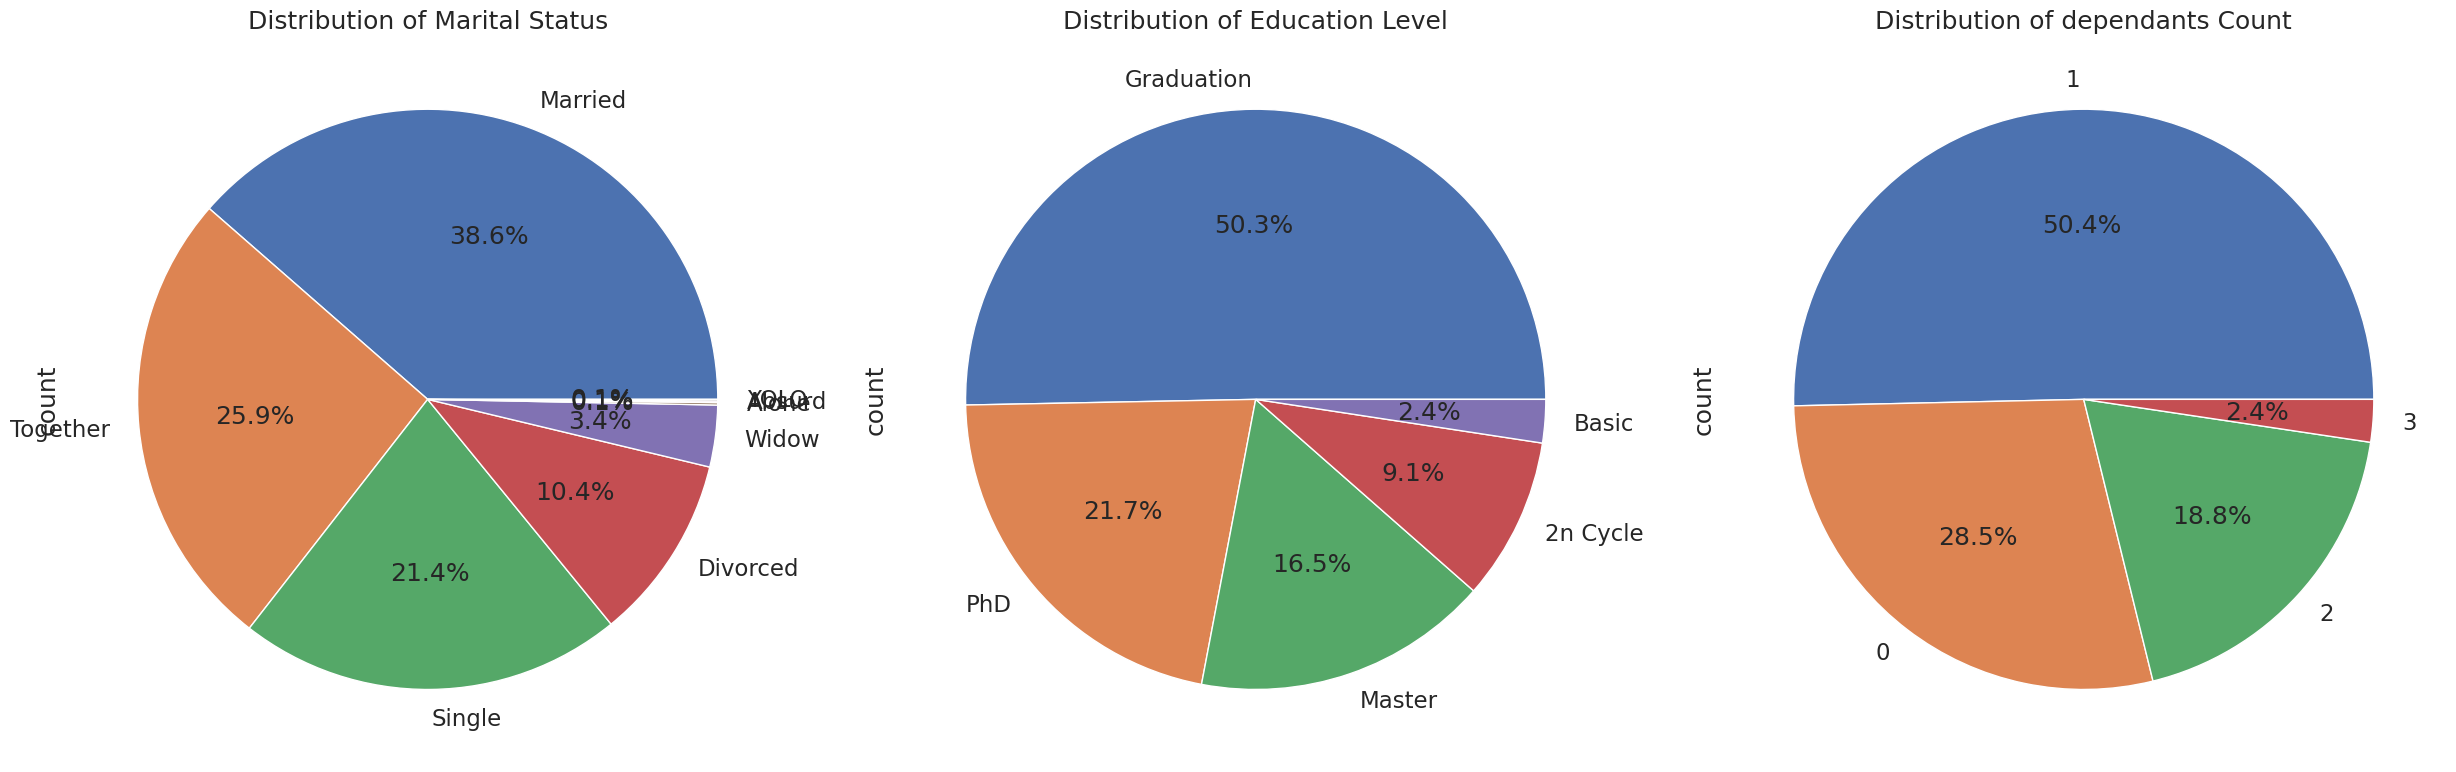

In [45]:
#pie chart of the distribution of the Marital Status, Education Level, and the number of dependants
fig, ax = plt.subplots(1, 3, figsize=(25, 8))
for i, col in enumerate(customer_profile.columns):
    customer_profile[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

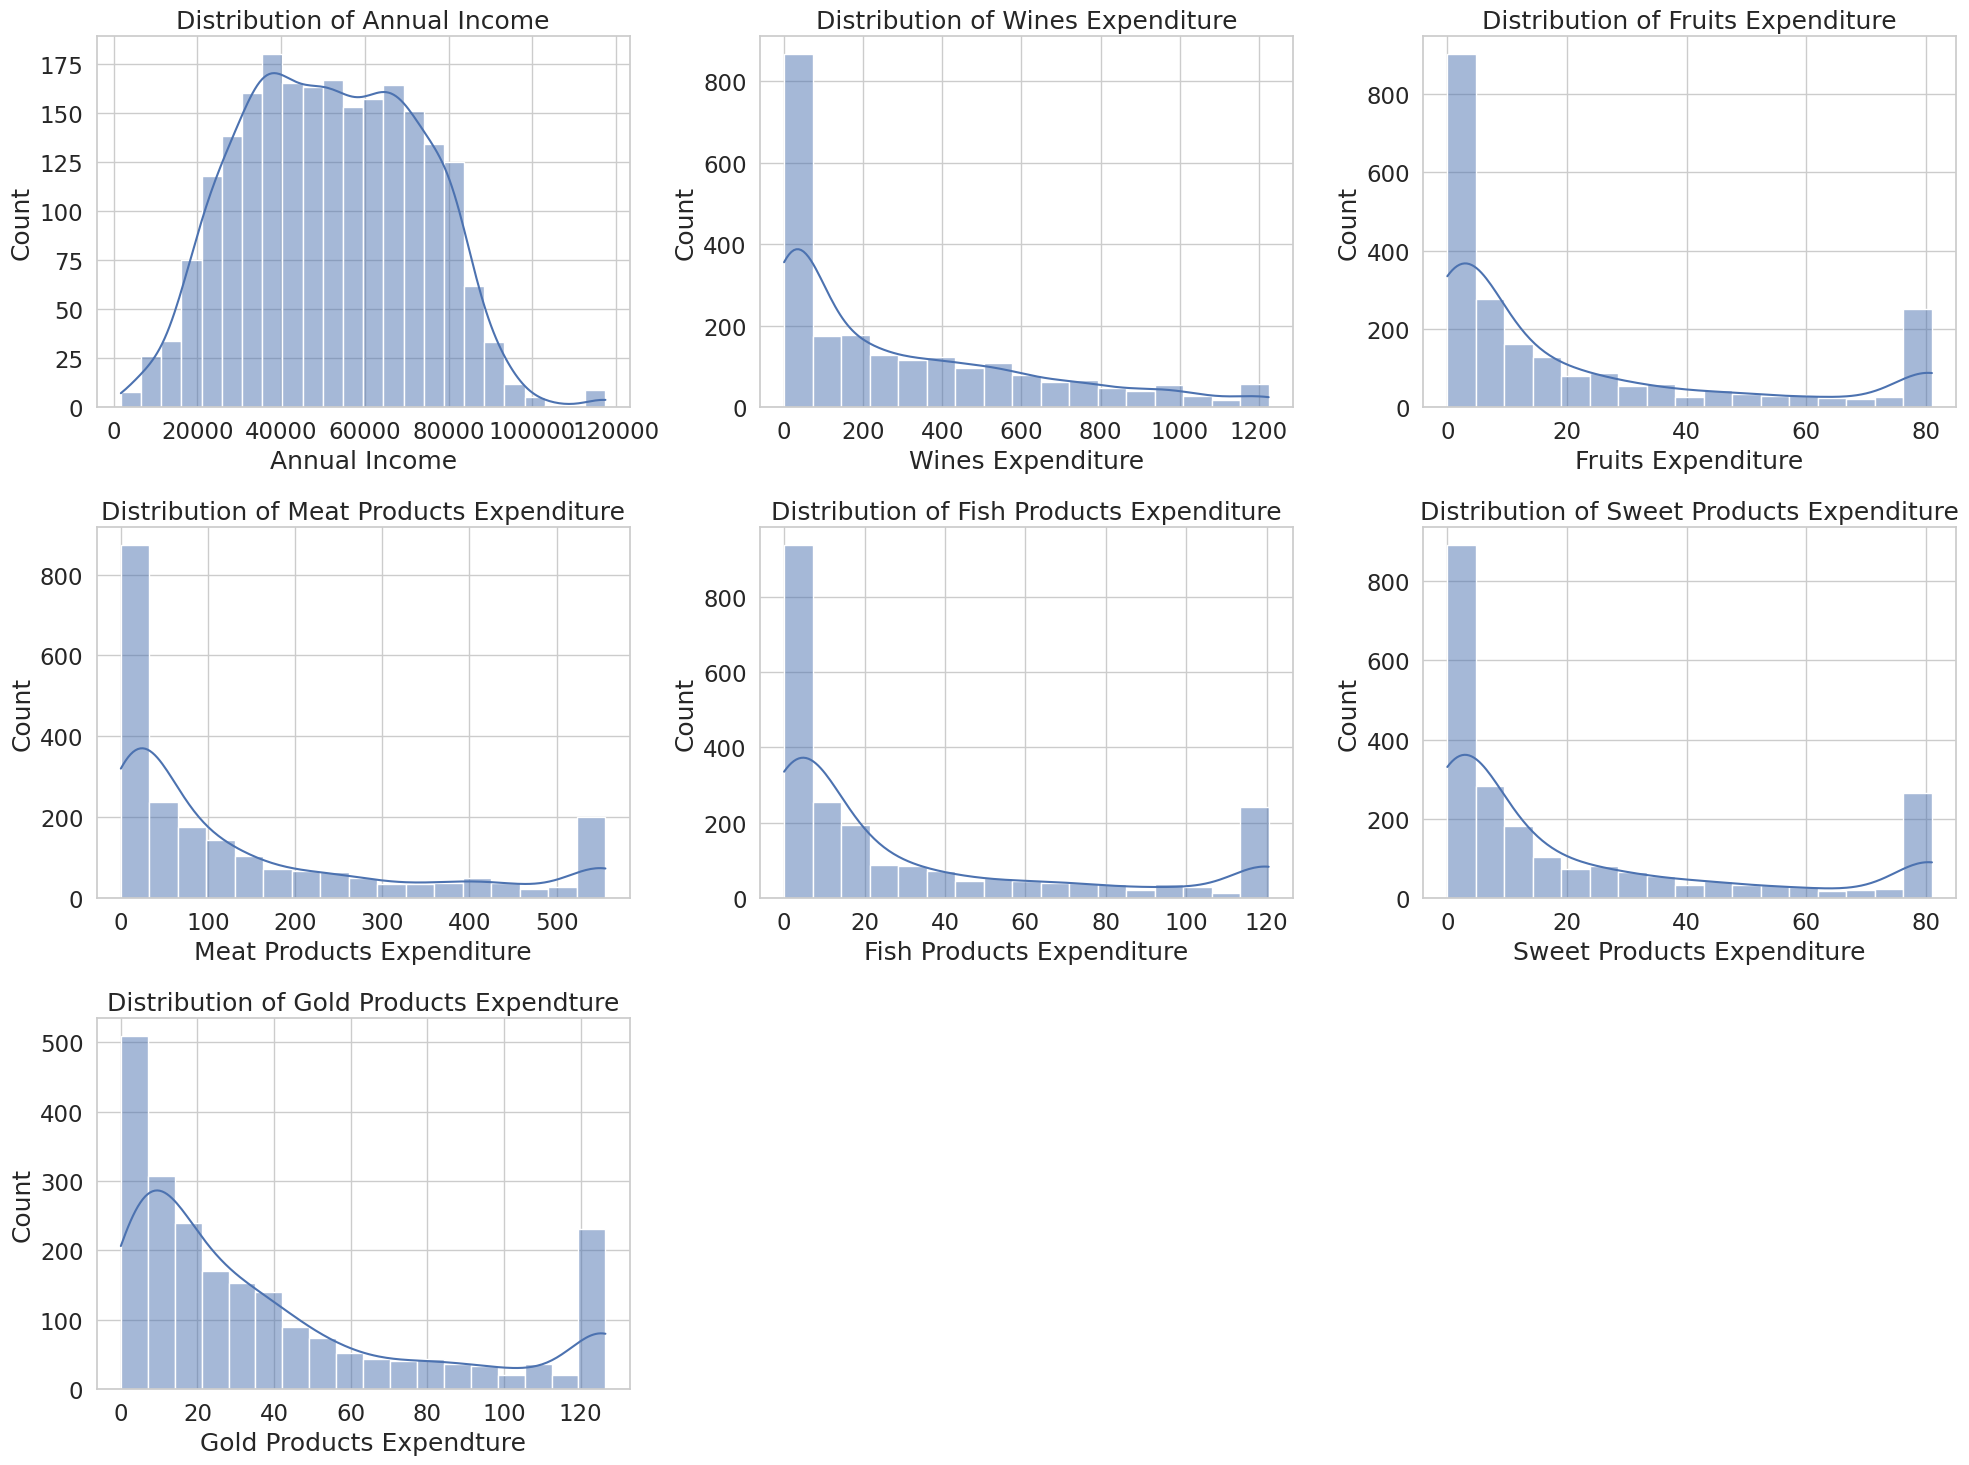

In [46]:
#Plotting the distribution of the numeric columns
plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cpa_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


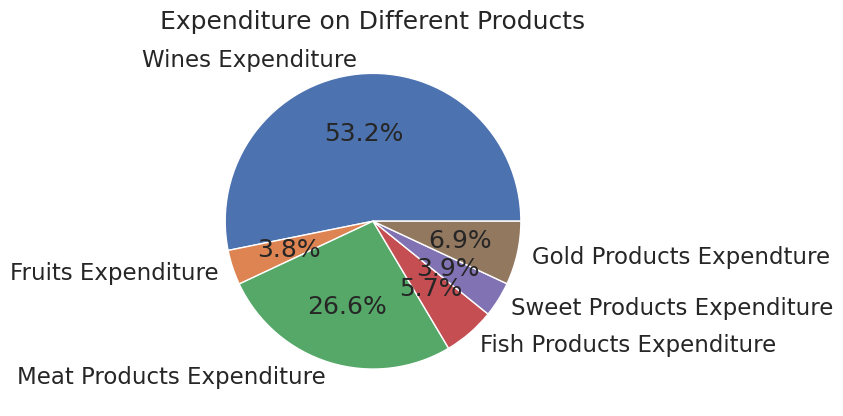

In [47]:
#pie chart of the expenditure on different products
expenditures = cpa_df[['Wines Expenditure', 'Fruits Expenditure', 'Meat Products Expenditure', 'Fish Products Expenditure', 'Sweet Products Expenditure', 'Gold Products Expendture']]
expenditures_sum = expenditures.sum()
expenditures_sum.plot.pie(autopct='%1.1f%%')
plt.title('Expenditure on Different Products')
plt.show()

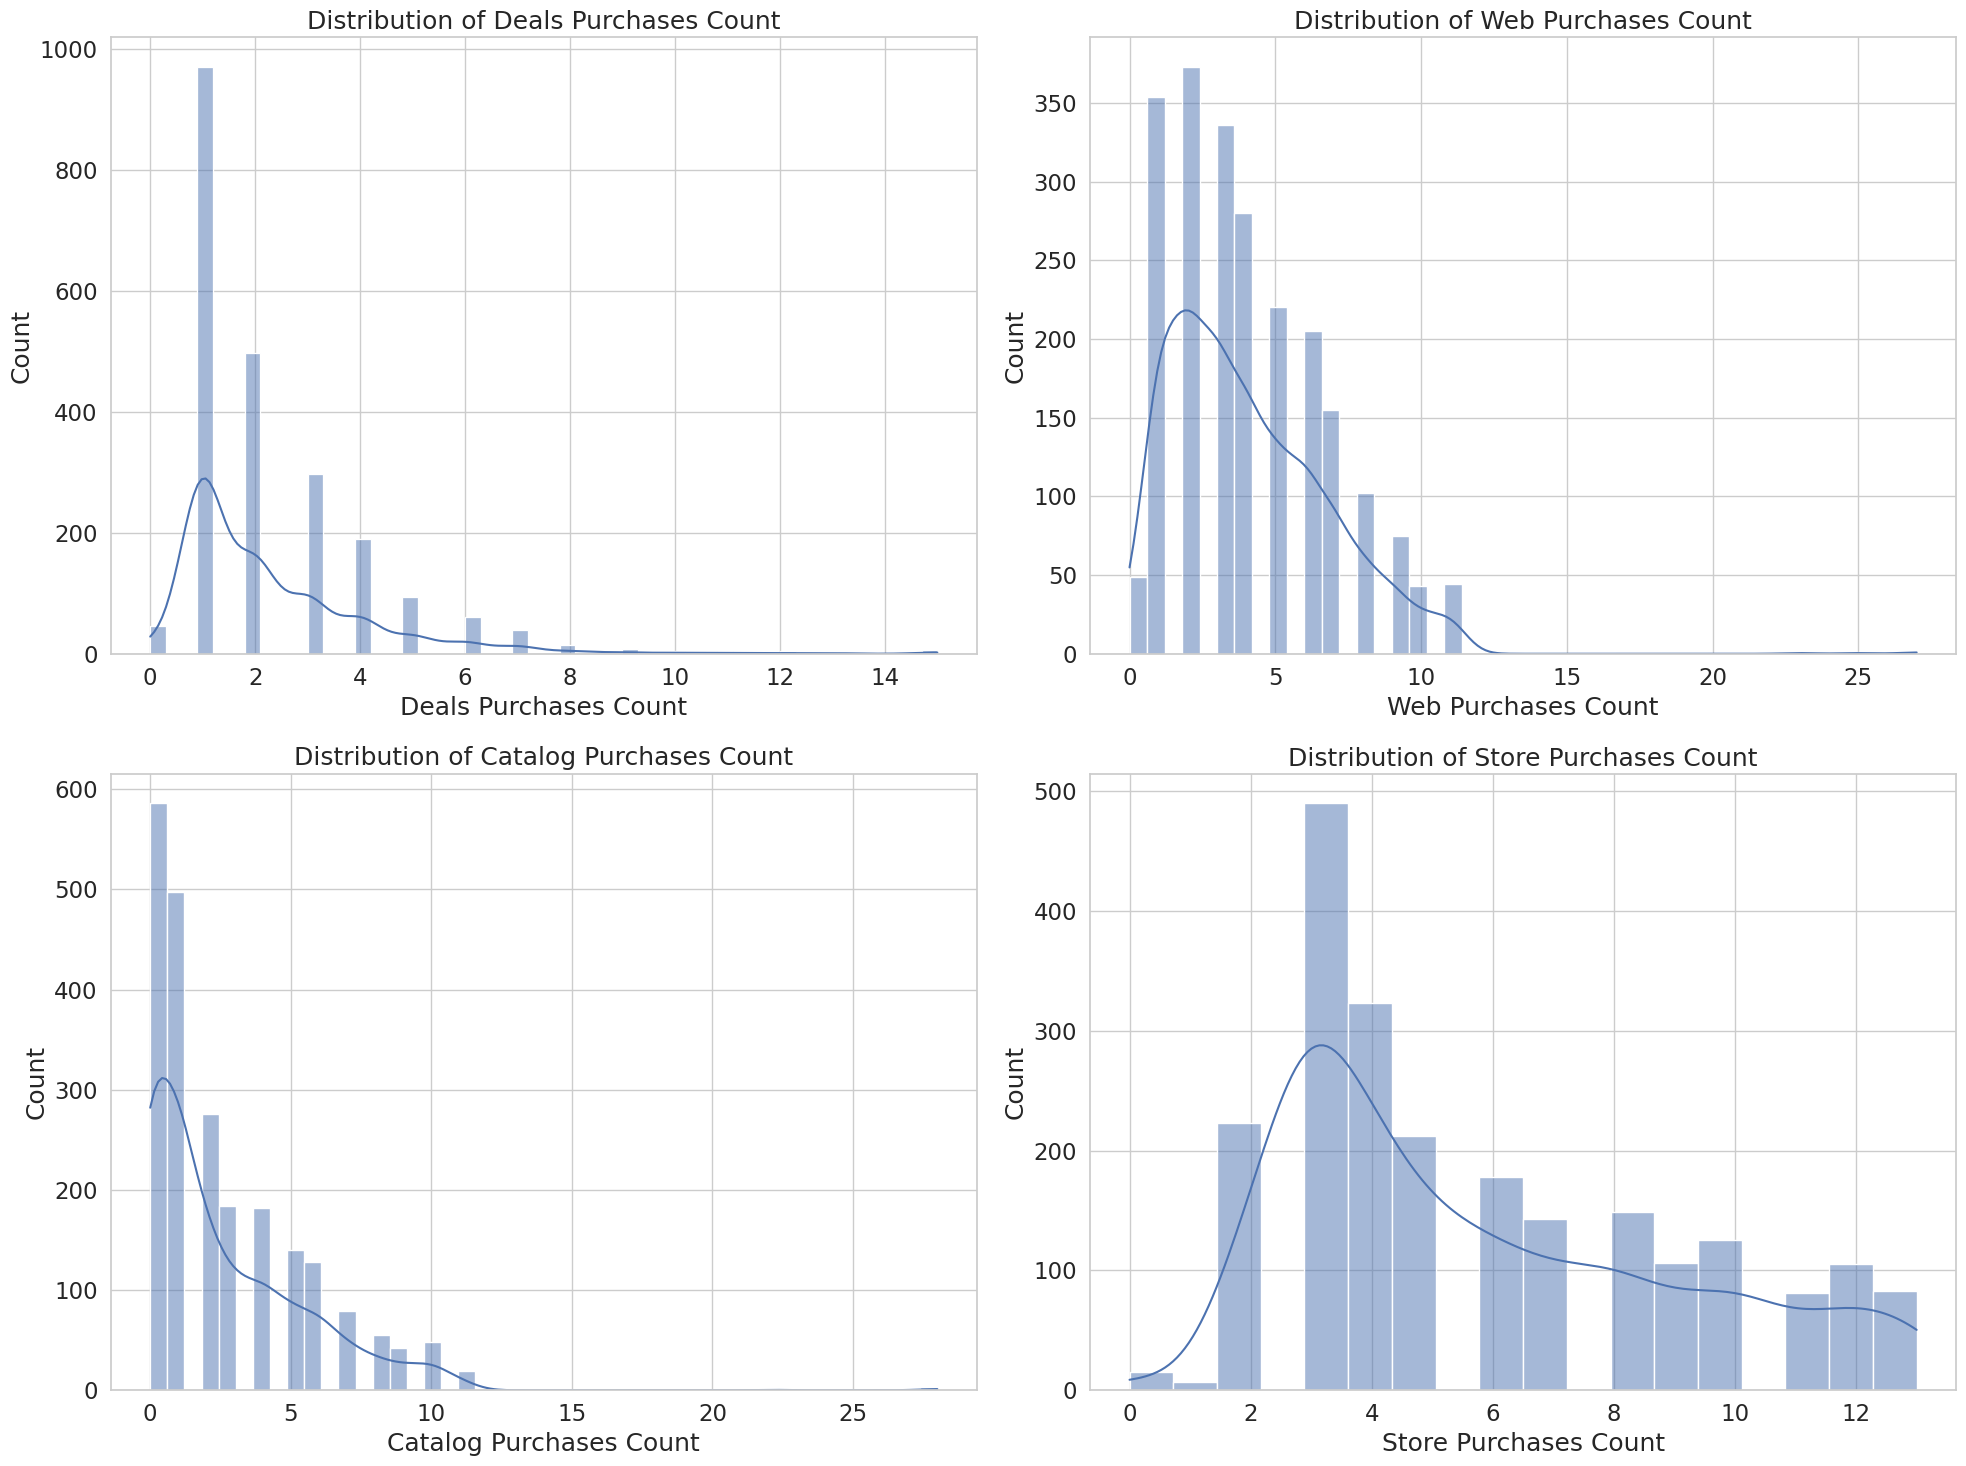

In [48]:
# Plotting the distribution of the purchase types
purchase_columns = ['Deals Purchases Count', 'Web Purchases Count', 'Catalog Purchases Count', 'Store Purchases Count']
plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
for i, col in enumerate(purchase_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(cpa_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

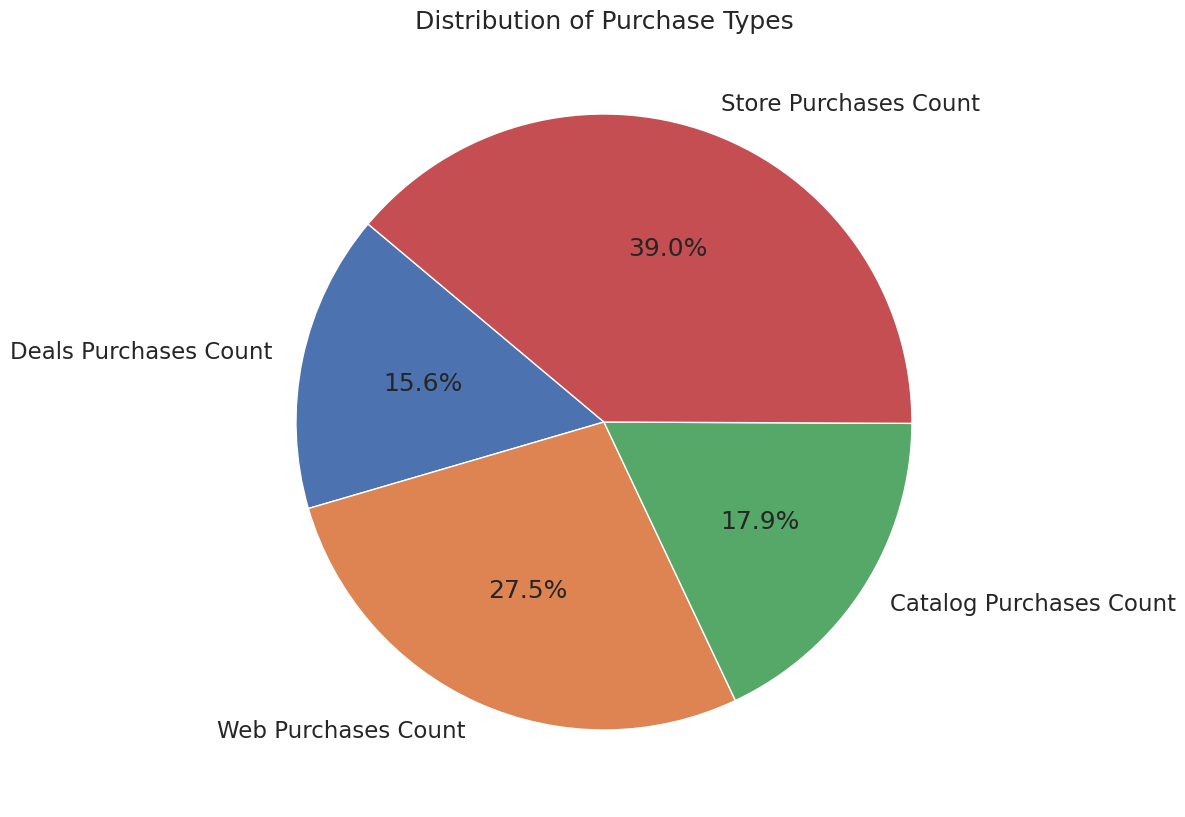

In [49]:
# Pie chart of the purchase types
purchase_counts = cpa_df[purchase_columns].sum()
plt.figure(figsize=(10, 10))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Types')
plt.show()

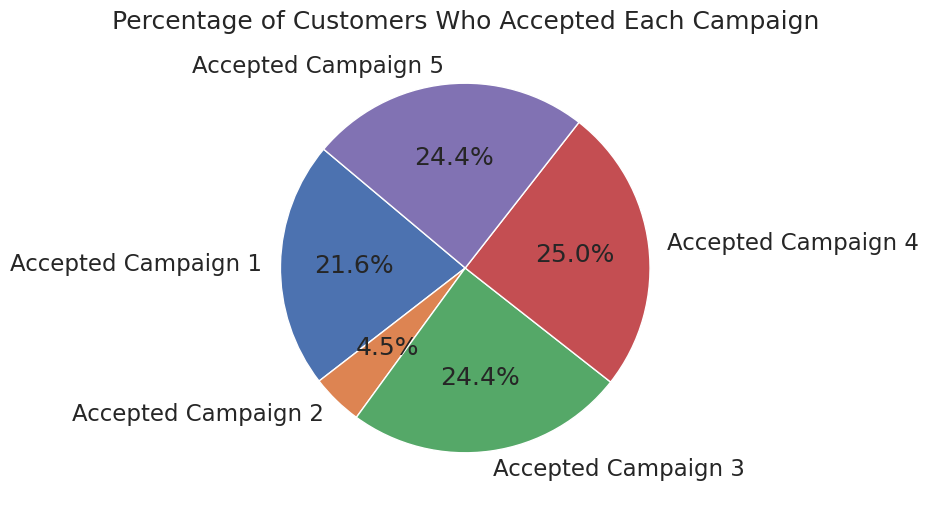

In [50]:
# Plotting the percentage of customers who accepted each campaign
campaign_columns = ['Accepted Campaign 1', 'Accepted Campaign 2', 'Accepted Campaign 3', 'Accepted Campaign 4', 'Accepted Campaign 5']
campaign_acceptance = cpa_df[campaign_columns].mean() * 100
#pie chart
plt.figure(figsize=(10, 6))
plt.pie(campaign_acceptance, labels=campaign_acceptance.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Customers Who Accepted Each Campaign')
plt.show()


---

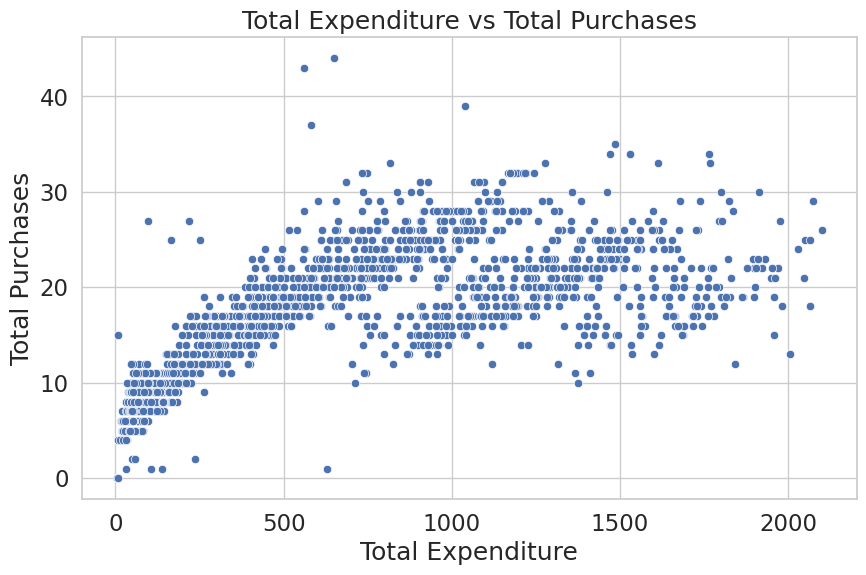

In [51]:
#scatter plot of the total expenditure and the total purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Expenditure', y='Total Purchases', data=cpa_df)
plt.title('Total Expenditure vs Total Purchases')
plt.xlabel('Total Expenditure')
plt.ylabel('Total Purchases')
plt.show()

/tmp/ipykernel_484792/505783478.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_education = cpa_df.groupby('Education Level')[purchase_columns].sum()


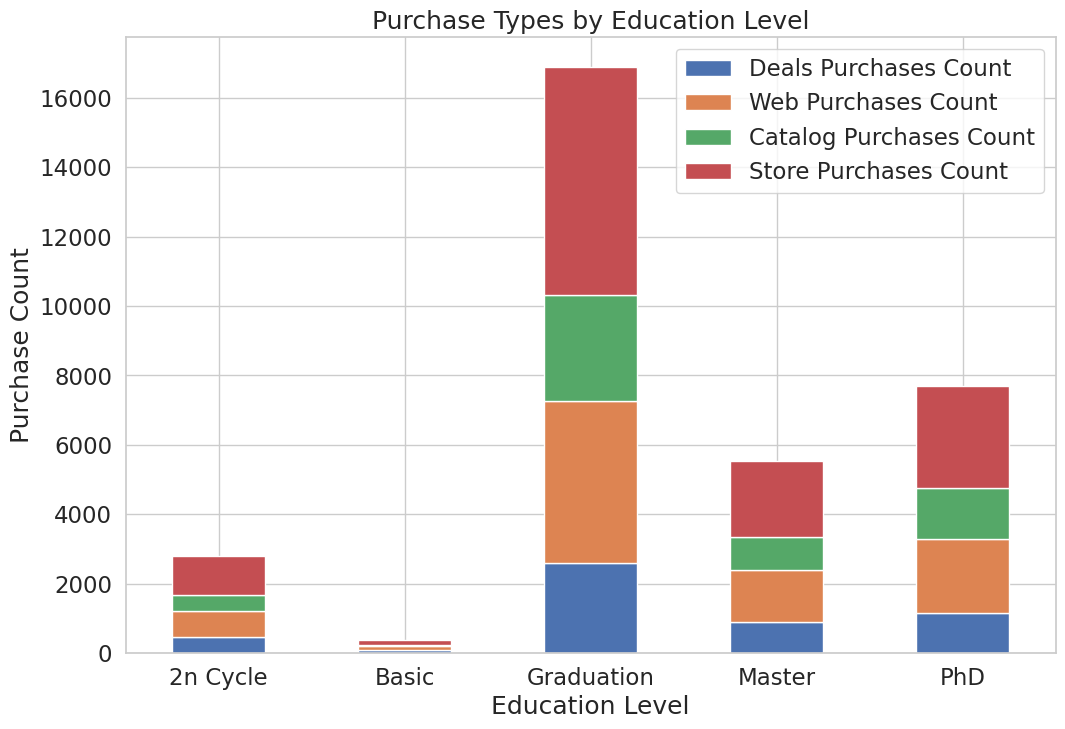

In [52]:
#stacked bar chart of the purchase types by education level
purchase_columns = ['Deals Purchases Count', 'Web Purchases Count', 'Catalog Purchases Count', 'Store Purchases Count']
purchase_by_education = cpa_df.groupby('Education Level')[purchase_columns].sum()
purchase_by_education.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Purchase Types by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_484792/1687559135.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_marital = cpa_df.groupby('Marital Status')[purchase_columns].sum()


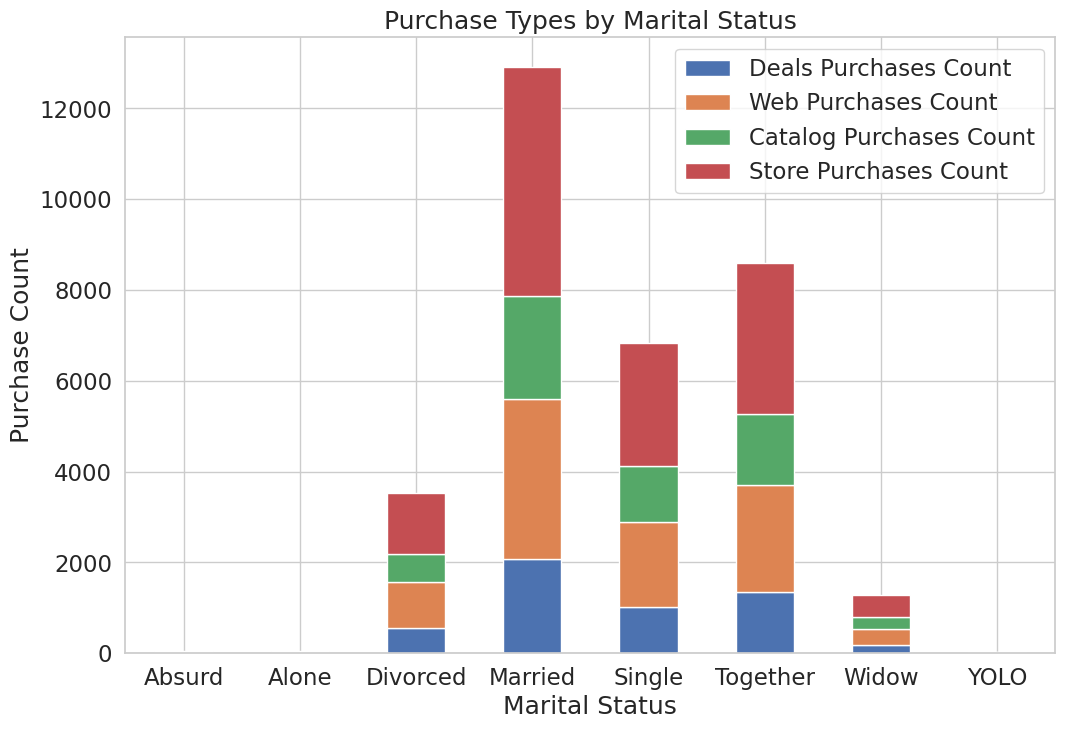

In [53]:
#stacked bar chart of the purchase types by marital status
purchase_by_marital = cpa_df.groupby('Marital Status')[purchase_columns].sum()
purchase_by_marital.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Purchase Types by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.show()

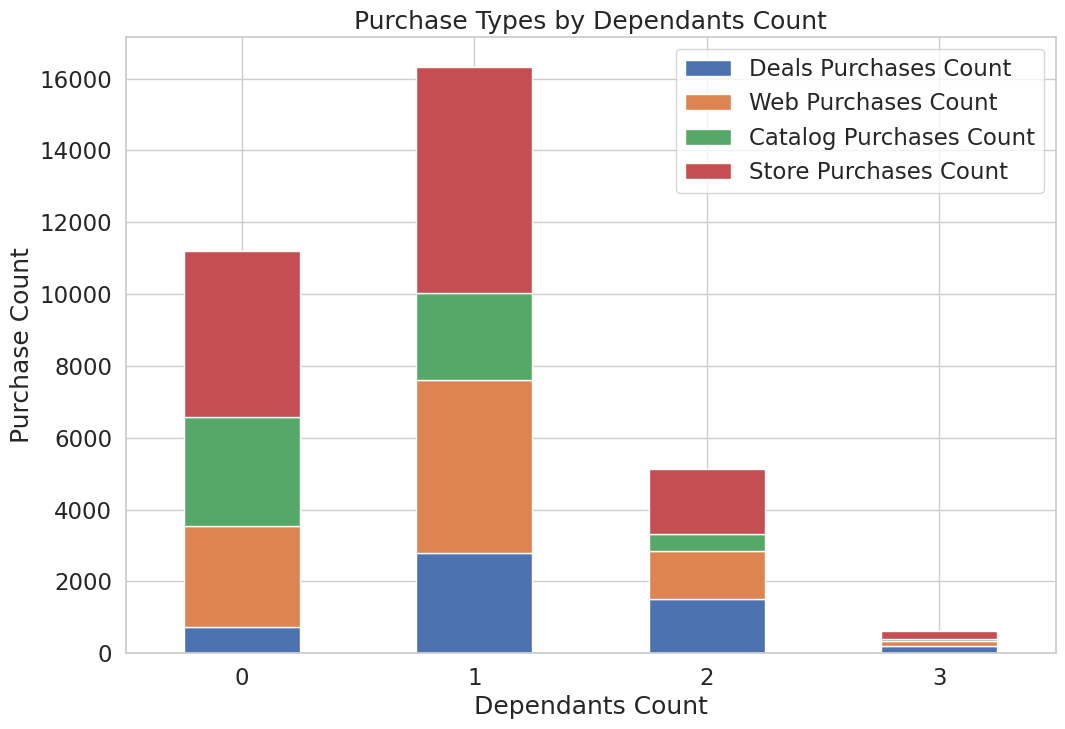

In [54]:
#stacked bar chart of the purchase types by dependants count
purchase_by_dependants = cpa_df.groupby('dependants Count')[purchase_columns].sum()
purchase_by_dependants.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Purchase Types by Dependants Count')
plt.xlabel('Dependants Count')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.show()

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
